## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.dropna(inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

<AxesSubplot:xlabel='long', ylabel='lat'>

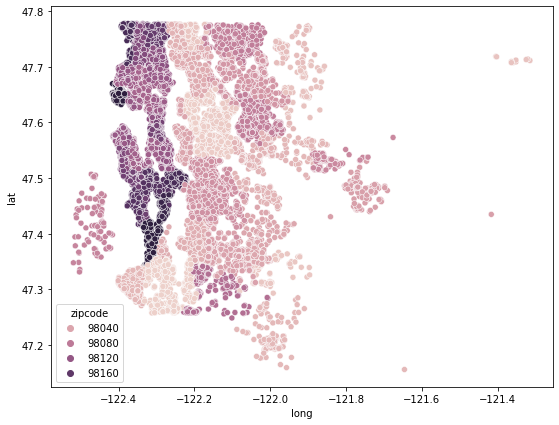

In [7]:
plt.figure(figsize=(9, 7))
sns.scatterplot(x = "long", y = "lat", hue = "zipcode", data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

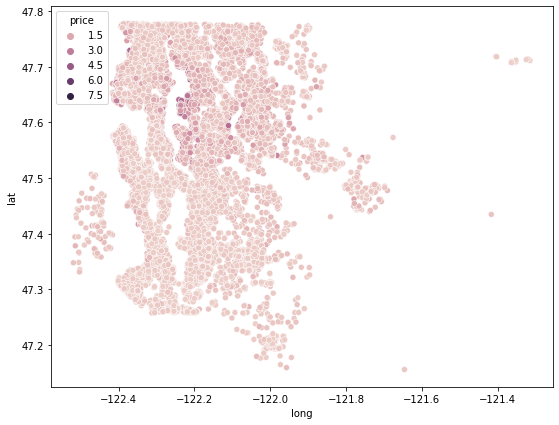

In [8]:
plt.figure(figsize=(9, 7))
sns.scatterplot(x = "long", y = "lat", hue = "price", data = df)

In [9]:
zipcodes = pd.get_dummies(df['zipcode'], prefix = 'zipcode')

In [10]:
zipcodes

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_with_zip = pd.concat([df, zipcodes], axis = 1)

In [12]:
df_with_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 91 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [13]:
import statsmodels.formula as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
outcome = 'price'
x_cols = df_with_zip.drop(['price', 'date', 'sqft_basement', 'id', 'zipcode', 'sqft_above'], axis = 1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

In [15]:
model = ols(formula = f, data = df_with_zip).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.801      
Dependent Variable:        price                  AIC:                      423717.6144
Date:                      2021-01-06 14:34       BIC:                      424369.1698
No. Observations:          15762                  Log-Likelihood:           -2.1177e+05
Df Model:                  84                     F-statistic:              757.3      
Df Residuals:              15677                  Prob (F-statistic):       0.00       
R-squared:                 0.802                  Scale:                    2.7542e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -27203797.7509 7372147.3999  -3.6901 0.0002 -41654056.7944 -12753538.7075
bedrooms         -29460.2875    1832.3163 -16.0782 0.0000    -33051.8388    -25868.7363
bathrooms         17718.2021    3162.9111   5.6019 0.0000     11518.5316     23917.8726
sqft_living         185.9121       3.2747  56.7726 0.0000       179.4934       192.3308
sqft_lot              0.2354       0.0461   5.1026 0.0000         0.1450         0.3258
floors           -10549.3239    3348.7577  -3.1502 0.0016    -17113.2751     -3985.3727
waterfront       685046.0889   17106.4093  40.0462 0.0000    651515.5540    718576.6238
view              49473.7875    2115.1107  23.3906 0.0000     45327.9266     53619.6485
condition         21621.2853    2321.6149   9.3130 0.0000     17070.6523     26171.9183
grade             63823.9572    2174.7659  29.3475 0.0000     59561.1651     68086.7492
yr_built           -912.9119      78.0609 -11.6949 0.0000     -1065.9203      -759.9035
yr_renovated         15.0203       3.5956   4.1774 0.0000         7.9725        22.0680
lat              241014.2767   76456.9884   3.1523 0.0016     91149.7627    390878.7908
long            -143720.7899   55777.1888  -2.5767 0.0100   -253050.5120    -34391.0678
sqft_living15        13.7921       3.4964   3.9447 0.0001         6.9388        20.6455
sqft_lot15           -0.0674       0.0711  -0.9476 0.3433        -0.2068         0.0720
zipcode_98001   -525557.1057  102687.2501  -5.1180 0.0000   -726835.9575   -324278.2540
zipcode_98002   -484472.8020  100073.6441  -4.8412 0.0000   -680628.6847   -288316.9193
zipcode_98003   -555600.3495  104965.6428  -5.2932 0.0000   -761345.1137   -349855.5853
zipcode_98004    174816.9140  107623.2012   1.6243 0.1043    -36136.9712    385770.7991
zipcode_98005   -299744.9065  106189.1430  -2.8227 0.0048   -507887.8722    -91601.9407
zipcode_98006   -319965.4012  102763.7285  -3.1136 0.0019   -521394.1596   -118536.6428
zipcode_98007   -346239.4491  105160.5156  -3.2925 0.0010   -552366.1865   -140112.7117
zipcode_98008   -337017.1224  103413.1542  -3.2589 0.0011   -539718.8301   -134315.4148
zipcode_98010   -429198.3449   90963.3687  -4.7184 0.0000   -607497.0374   -250899.6525
zipcode_98011   -513409.1007  113038.8452  -4.5419 0.0000   -734978.2727   -291839.9287
zipcode_98014   -456096.0913   95246.9952  -4.7886 0.0000   -642791.1856   -269400.9970
zipcode_98019   -505561.9821  102024.6743  -4.9553 0.0000   -705542.1091   -305581.8551
zipcode_98022   -470832.4500   87030.9929  -5.4099 0.0000   -641423.2322   -300241.6678
zipcode_98023   -575982.1849  107475.2394  -5.3592 0.0000   -786646.0480   -365318.3219
zipcode_98024   -382813.5705   93764.2553  -4.0827 0.0000   -566602.3235   -199024.8174
zipcode_98027   -396907.1267   96640.5890  -4.1070 0.0000   -586333.8254   -207480.4280
zipcode_98028   -521326.2981  114737.7405  -4.5436 0.0000   -746225.5008   -296427.0954
zipcode_98029   -35

In [16]:
df.loc[(df.lat > 47.5) & (df.long > -122.2), "sector_1"] = 1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  float64
 9   view           15762 non-null  float64
 10  condition      15762 non-null  int64  
 11  grade          15762 non-null  int64  
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [18]:
df.fillna(value = 2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sector_1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,1.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,2.0
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2.0


<AxesSubplot:xlabel='long', ylabel='lat'>

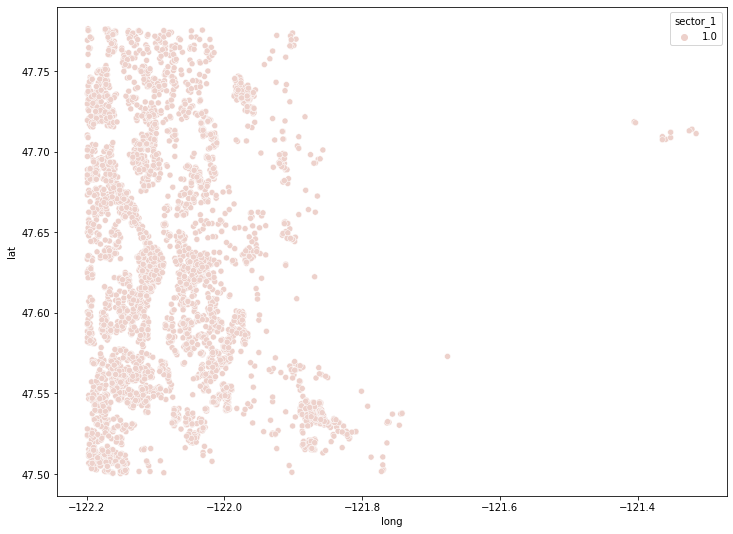

In [20]:
plt.figure(figsize=(12,9))
sns.scatterplot(x = "long", y = "lat", hue = "sector_1" , data=df)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
data = df_with_zip.copy()

In [23]:
y = data['price']
X = data.drop(['price', 'date', 'sqft_basement', 'id', 'zipcode', 'sqft_above'], axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
len(X_test)

3153

In [26]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

In [32]:
print('Train MSE:', mse_train)
print('Test MSE:', mse_test)

Train MSE: 26729006363.606956
Test MSE: 30482915359.291718


In [34]:
print('RMSE Train:', np.sqrt(mse_train))
print('RMSE Test:', np.sqrt(mse_test))

RMSE Train: 163490.08032173375
RMSE Test: 174593.57193004477


In [35]:
from sklearn.metrics import r2_score

r2_score(y_test, y_hat_test)

0.7979260207969271

In [39]:
residuals = (y_test - y_hat_test)

In [41]:
import statsmodels

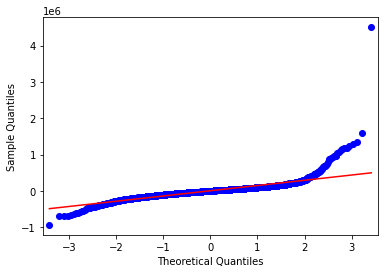

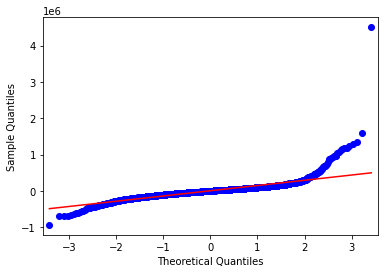

In [44]:
statsmodels.graphics.gofplots.qqplot(residuals, line = "r")

In [46]:
np.sqrt(mse_test) / df_with_zip.price.mean()

0.3225346982416605